# Exercise: Decision Trees
* start by importing the DecisionTreeClassifier
* you'll want pandas as well

## Read in the Breast Cancer dataset, __`bcan.csv`__
* look out for missing data–remember to inform pandas about it
* at this point you might want to simply drop the missing data

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/davewadestein/Gap-Python-2025/refs/heads/main/Data/bcan.csv', na_values='?')
data.head()

,id,Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses,Diag
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


## Drop the __`id`__ since it's not going to the model
* also note that Diag is the diagnosis, which is what we're going to predict
* ...so we'll need to capture that column and then remove it from the dataframe

In [2]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8)

## Remember that __`sklearn`__ wants the features in 2-d matrix, and the targets in a 1-d array

In [3]:
data = data.dropna()
y = data.Diag # put diagnosis into y
data = data.drop(['Diag', 'id'], axis=1)

In [4]:
data.head()

,Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [5]:
y.shape

(683,)

## Fit the model
* if you get an error here, figure out why

In [6]:
model.fit(data, y)

DecisionTreeClassifier(max_depth=8)

## Use export_graphviz to generate the dot file
* __`feature_names`__ should be the list of column headers
* __`class_names`__ should be the targets

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="bcan_tree.dot",
               feature_names=data.columns,
               class_names=['benign', 'malignant'],
               rounded=True,
               filled=True)

## Generate a PNG images from the dot file and open it

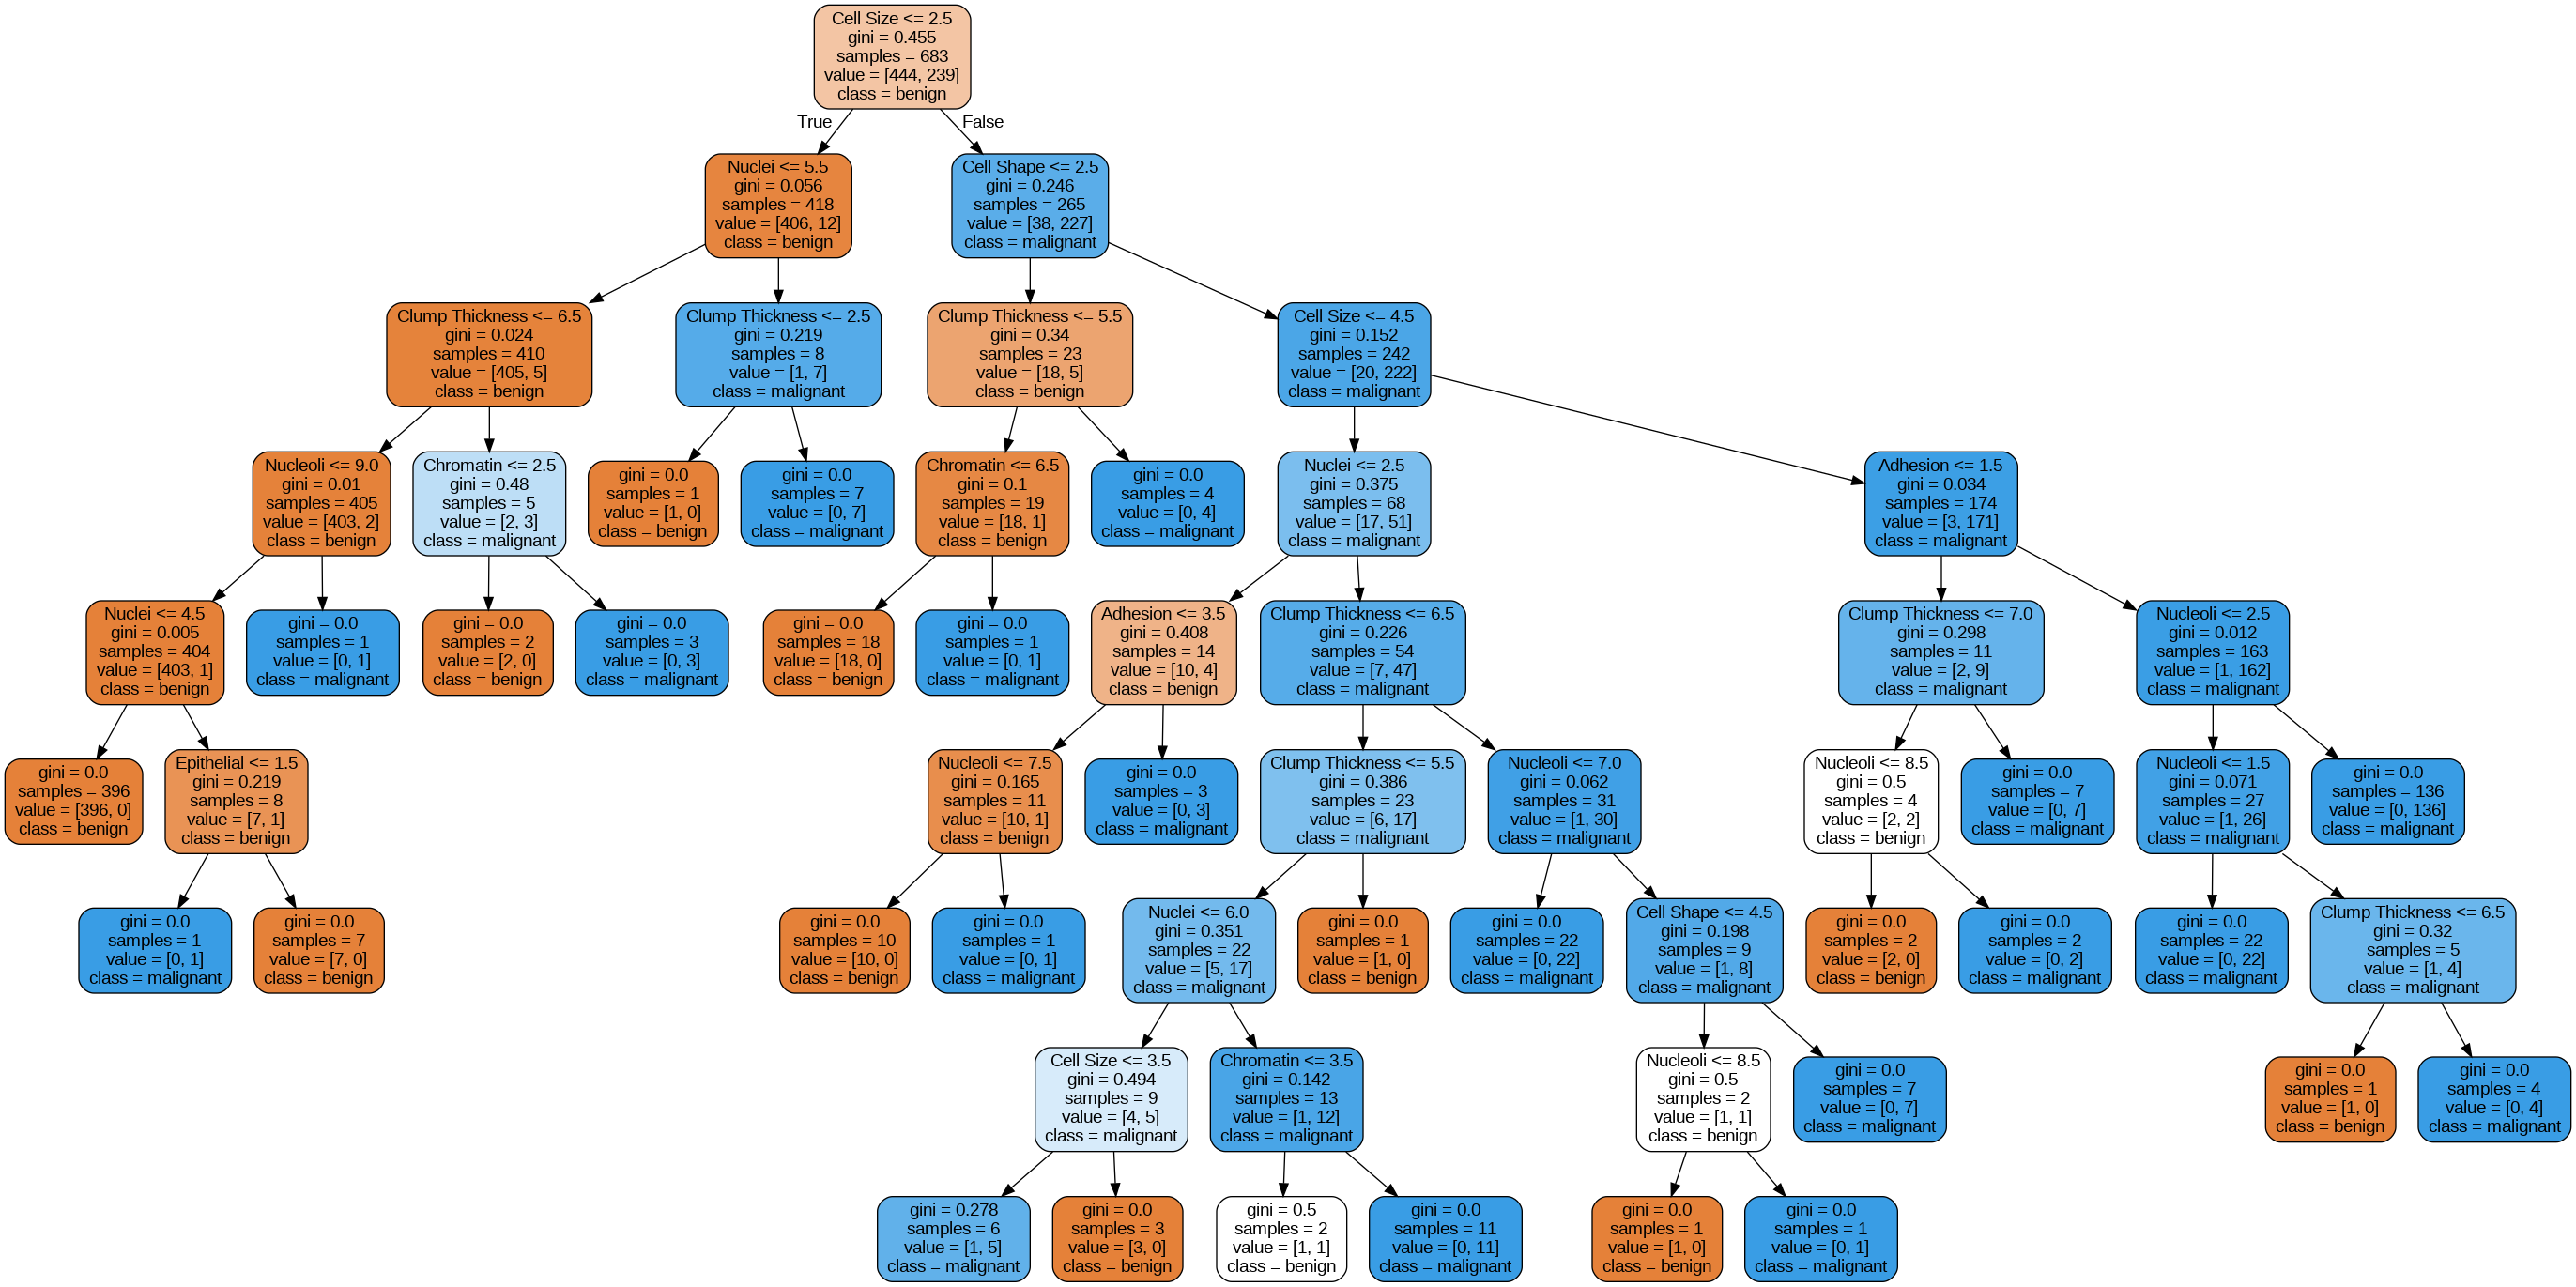

In [8]:
!dot -Tpng bcan_tree.dot -o bcan_tree.png
from IPython.display import Image
Image('bcan_tree.png')

## How well did the model do?

In [9]:
model.score(data, y)

0.9970717423133236

## Do we do better if we increase the tree depth?

## Why might we not want to do that?